this will contain my data exploration and cleaning after looking on many websites for some data sets, this has allowed me to see the prossess of trying to pick a data set that was able to meet the need and fit the question for this assiasment it was hard to pick a data set that was intresting and also fit the idea and scope of the project  i looked for a project that would have some data that was not to big also had some data that was numaric as well as had some insites that could be tested i was looking for something in entertainment or something to do with pop culture after importing the data set i had to clean the data this included getting the colums set for the data analsys this included removing words as well as filling in some of the data points and looking for null valuse that might cause some issues down the line after that was finished i wanted to get the dates seperrated but this was harder then i orignaly thought 

In [166]:
import pandas as pd
import numpy as np 
import datetime as dt
import scipy.stats as stats
from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns

# cleaning and preping data for analysis 

In [167]:
# File to Load 
Top_Anime  ="Resources/Top100Anime.csv"

anime_df = pd.read_csv(Top_Anime)



In [168]:
anime_df.head(10)


,Title,Score,Episodes,Aired,Votes
0,Fullmetal Alchemist: Brotherhood\n\n,9.14,TV (64 eps),Apr 2009 - Jul 2010,"2,895,245 members"
1,Gintama\n\n\n\n,9.08,TV (51 eps),Apr 2015 - Mar 2016,"537,423 members"
2,Steins;Gate\n\n\n\n,9.08,TV (24 eps),Apr 2011 - Sep 2011,"2,246,631 members"
3,Shingeki no Kyojin Season 3 Part 2\n\n\n\n\n,9.07,TV (10 eps),Apr 2019 - Jul 2019,"1,849,709 members"
4,Gintama'\n\n\n\n,9.05,TV (51 eps),Apr 2011 - Mar 2012,"473,756 members"
5,Hunter x Hunter (2011)\n\n\n\n,9.05,TV (148 eps),Oct 2011 - Sep 2014,"2,384,407 members"
6,Gintama': Enchousen\n\n\n\n,9.04,TV (13 eps),Oct 2012 - Mar 2013,"282,513 members"
7,Fruits Basket: The Final\n\n\n\n \n,9.03,TV (13 eps),Apr 2021 - Jun 2021,"351,472 members"
8,Spy x Family\n\n\n,9.02,TV (12 eps),Apr 2022 - Jun 2022,"776,383 members"
9,Gintama.\n\n\n\n,8.99,TV (12 eps),Jan 2017 - Mar 2017,"269,348 members"


In [170]:
anime_df = anime_df.replace('\n','', regex=True)


In [171]:
anime_df = anime_df.replace(' members','', regex=True)

In [172]:
anime_df = anime_df.replace('TV ','', regex=True)

In [173]:
# anime_df = anime_df.replace('(  )','', regex=True)
# anime_df turning episodes to intager so it can be used in grapgh 
anime_df['Episodes'] = anime_df['Episodes'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [174]:
# added one pieces epsiodes because it had a ? in the place of the eisodes count 
anime_df.at[48,'Episodes']

nan

In [175]:
anime_df.at[48,'Episodes']=1035



In [176]:
anime_df.at[48,'Aired']

'Oct 1999 -'

In [177]:
anime_df.at[48,'Aired']='Oct 1999 - curent'
anime_df.at[48,'Aired']

'Oct 1999 - curent'

In [178]:
anime_df.at[48, 'Episodes']

1035.0

In [179]:
# anime_df["clean_episodes"] = anime_df["epsiodes"].apply(lamda x: CleanEpisodes(x))
# anime_df["clean_votes"] = anime_df["votes"].apply(lamda x: CleanMembers(x))

print(anime_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     100 non-null    object 
 1   Score     100 non-null    float64
 2   Episodes  100 non-null    float64
 3   Aired     100 non-null    object 
 4   Votes     100 non-null    object 
dtypes: float64(2), object(3)
memory usage: 4.0+ KB
None


In [180]:
anime_df ['Episodes'] = anime_df ['Episodes'].astype(int)
anime_df

,Title,Score,Episodes,Aired,Votes
0,Fullmetal Alchemist: Brotherhood,9.14,64,Apr 2009 - Jul 2010,"2,895,245"
1,Gintama,9.08,51,Apr 2015 - Mar 2016,"537,423"
2,Steins;Gate,9.08,24,Apr 2011 - Sep 2011,"2,246,631"
3,Shingeki no Kyojin Season 3 Part 2,9.07,10,Apr 2019 - Jul 2019,"1,849,709"
4,Gintama',9.05,51,Apr 2011 - Mar 2012,"473,756"
...,...,...,...,...,...
95,Haikyuu!!,8.45,25,Apr 2014 - Sep 2014,"1,701,435"
96,JoJo no Kimyou na Bouken Part 3: Stardust Crus...,8.44,24,Jan 2015 - Jun 2015,"935,670"
97,Saiki Kusuo no Ψ-nan 2,8.44,24,Jan 2018 - Jun 2018,"540,859"
98,Mononoke,8.43,12,Jul 2007 - Sep 2007,"278,180"


In [181]:
anime_df.columns

Index(['Title', 'Score', 'Episodes', 'Aired', 'Votes'], dtype='object')

In [182]:
anime_df.count()

Title       100
Score       100
Episodes    100
Aired       100
Votes       100
dtype: int64

In [183]:
anime_df

,Title,Score,Episodes,Aired,Votes
0,Fullmetal Alchemist: Brotherhood,9.14,64,Apr 2009 - Jul 2010,"2,895,245"
1,Gintama,9.08,51,Apr 2015 - Mar 2016,"537,423"
2,Steins;Gate,9.08,24,Apr 2011 - Sep 2011,"2,246,631"
3,Shingeki no Kyojin Season 3 Part 2,9.07,10,Apr 2019 - Jul 2019,"1,849,709"
4,Gintama',9.05,51,Apr 2011 - Mar 2012,"473,756"
...,...,...,...,...,...
95,Haikyuu!!,8.45,25,Apr 2014 - Sep 2014,"1,701,435"
96,JoJo no Kimyou na Bouken Part 3: Stardust Crus...,8.44,24,Jan 2015 - Jun 2015,"935,670"
97,Saiki Kusuo no Ψ-nan 2,8.44,24,Jan 2018 - Jun 2018,"540,859"
98,Mononoke,8.43,12,Jul 2007 - Sep 2007,"278,180"


In [185]:
anime_df['Votes'].replace(',','', regex=True, inplace=True)

In [186]:
anime_df ['Votes'] = anime_df ['Votes'].astype(int)

In [187]:
anime_df ['Votes'].dtype

dtype('int32')

In [188]:
anime_df.at[48, 'Episodes']

1035

In [189]:
anime_df['Votes'] = anime_df['Votes'].astype(str).astype(int)
anime_df['Votes'].dtype

dtype('int32')

In [190]:
anime_df['Votes'].dtype

dtype('int32')

In [191]:
avarage_eps_score = anime_df['Score'].mean()
avarage_eps_score

8.673399999999999

In [192]:
avarage_eps_count = anime_df['Episodes'].mean()
avarage_eps_count

38.07

In [199]:
anime_df.columns

Index(['Title', 'Score', 'Episodes', 'Aired', 'Votes'], dtype='object')

In [200]:
anime_most_Epi =  anime_df['Episodes'].max()


In [201]:
anime_min_Epi =  anime_df['Episodes'].min()


In [202]:
anime_highest_score =  anime_df['Score'].max()


In [203]:
anime_lowest_score =  anime_df['Score'].min()


In [204]:
anime_most_Epi, anime_min_Epi, anime_highest_score, anime_lowest_score

(1035, 7, 9.14, 8.43)

# cleaning is done and reado to be worked with 

tried to make the sample groupes but was not able to use this for the anove test the groups need to be devided by the index thats based on the score but the random set was not able to work

In [207]:
# sample groups

first_group = anime_df.sample(frac=0.25, random_state=0)
second_group = anime_df.sample(frac=0.25, random_state=1)
third_group = anime_df.sample(frac=1/4, random_state=2)
final_group = anime_df.sample(frac=0.25, random_state=3)

# first_3 = anime_df.sample(frac=1/3, random_state=0)
# second_3 = anime_df.sample(frac=0.33, random_state=1)
# third_3 = anime_df.sample(frac=0.33, random_state=2)

In [211]:
# first_group_ANOVA = first_group.drop(columns=['Aired', 'Votes'])
# second_group_ANOVA = second_group.drop(columns=['Aired', 'Votes'])
# third_group_ANOVA = third_group.drop(columns=['Aired', 'Votes'])
# final_group_ANOVA = final_group.drop(columns=['Aired', 'Votes'])

# first_group_ANOVA.head(5), second_group_ANOVA.head(5), third_group_ANOVA.head(5), final_group_ANOVA.head(5),

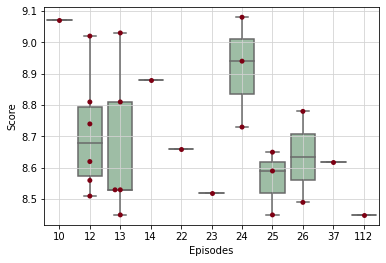

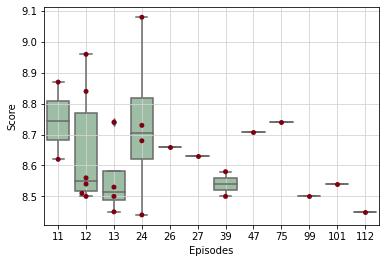

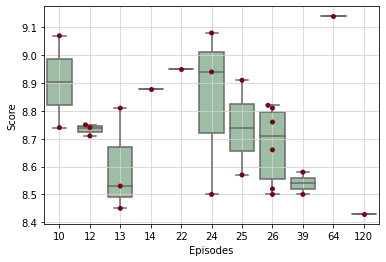

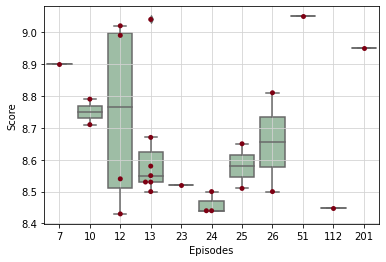

In [212]:
ax1 = sns.boxplot(x='Episodes', y='Score', data=first_group_ANOVA, color='#99c2a2')
ax1 = sns.swarmplot(x="Episodes", y="Score", data=first_group_ANOVA, color='#7d0013')
plt.grid(zorder=0, color = "#D3D3D3")
plt.show()

ax2 = sns.boxplot(x='Episodes', y='Score', data=second_group_ANOVA, color='#99c2a2')
ax2 = sns.swarmplot(x='Episodes', y='Score', data=second_group_ANOVA, color='#7d0013')
plt.grid(zorder=0, color = "#D3D3D3")
plt.show()

ax3 = sns.boxplot(x='Episodes', y='Score', data=third_group_ANOVA, color='#99c2a2')
ax3 = sns.swarmplot(x='Episodes', y='Score', data=third_group_ANOVA, color='#7d0013')
plt.grid(zorder=0, color = "#D3D3D3")
plt.show()

ax4 = sns.boxplot(x='Episodes', y='Score', data=final_group_ANOVA, color='#99c2a2')
ax4 = sns.swarmplot(x='Episodes', y='Score', data=final_group_ANOVA, color='#7d0013')
plt.grid(zorder=0, color = "#D3D3D3")
plt.show()



c:\Users\awood\anaconda3\envs\PythonData38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\awood\anaconda3\envs\PythonData38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\awood\anaconda3\envs\PythonData38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


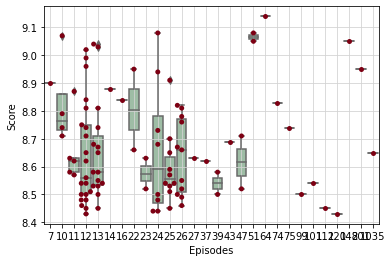

In [216]:
ax = sns.boxplot(x='Episodes', y='Score', data=anime_df, color='#99c2a2')
ax = sns.swarmplot(x='Episodes', y='Score', data=anime_df, color='#7d0013')
plt.grid(zorder=0, color = "#D3D3D3")

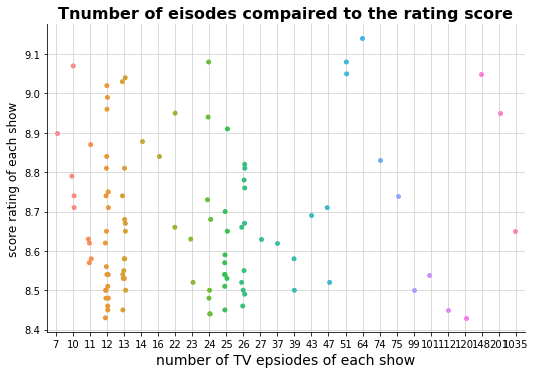

In [218]:
mystripplot = sns.catplot(data=anime_df, x="Episodes", y="Score", aspect=1.5)
# figsize=(200,200)
# plt.rcParams['figure.figsize'] = [10,5]

plt.title("Tnumber of eisodes compaired to the rating score",fontsize=16, fontweight='bold')
plt.xlabel("number of TV epsiodes of each show", fontsize=14)
plt.ylabel("score rating of each show",fontsize=12)
plt.grid(zorder=0, color = "#D3D3D3")

Text(0, 0.5, 'score rating of each show')

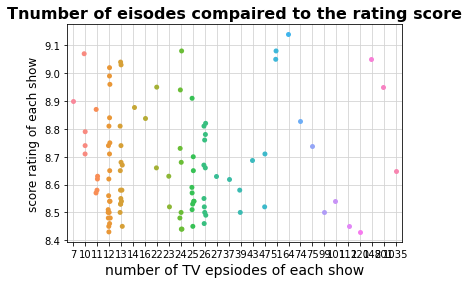

In [219]:
mystripplot2 = sns.stripplot(data=anime_df, x="Episodes", y="Score")
plt.grid(zorder=0, color = "#D3D3D3")

plt.title("Tnumber of eisodes compaired to the rating score",fontsize=16, fontweight='bold')
plt.xlabel("number of TV epsiodes of each show", fontsize=14)
plt.ylabel("score rating of each show",fontsize=12)

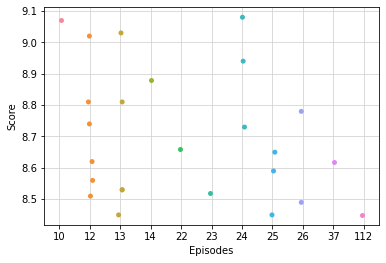

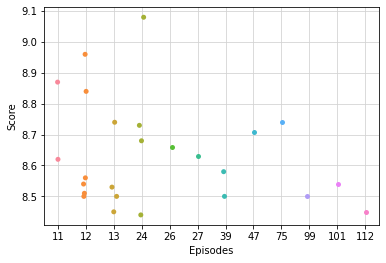

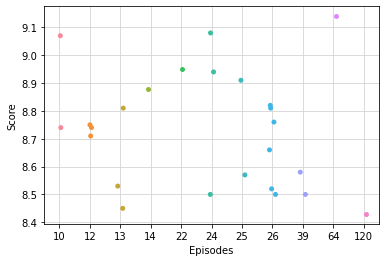

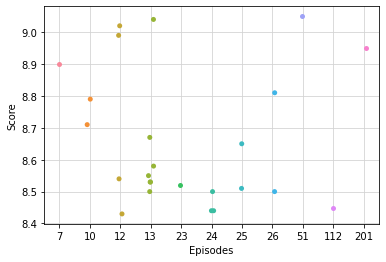

In [214]:
mystripplot2 = sns.stripplot(data=first_group_ANOVA, x="Episodes", y="Score")
plt.grid(zorder=0, color = "#D3D3D3")
plt.show()
mystripplot3 = sns.stripplot(data=second_group_ANOVA, x="Episodes", y="Score")
plt.grid(zorder=0, color = "#D3D3D3")
plt.show()
mystripplot4 = sns.stripplot(data=third_group_ANOVA, x="Episodes", y="Score")
plt.grid(zorder=0, color = "#D3D3D3")
plt.show()
mystripplot5 = sns.stripplot(data=final_group_ANOVA, x="Episodes", y="Score")
plt.grid(zorder=0, color = "#D3D3D3")
plt.show()


In [215]:
most_epsiodes = anime_df.sort_values(by='Episodes', ascending=False)

most_epsiodes = most_epsiodes.reset_index()

most_epsiodes

,index,Title,Score,Episodes,Aired,Votes
0,48,One Piece,8.65,1035,Oct 1999 - curent,1890707
1,12,Gintama,8.95,201,Apr 2006 - Mar 2010,946472
2,5,Hunter x Hunter (2011),9.05,148,Oct 2011 - Sep 2014,2384407
3,99,Saiki Kusuo no Ψ-nan,8.43,120,Jul 2016 - Dec 2016,922256
4,93,Yuu☆Yuu☆Hakusho,8.45,112,Oct 1992 - Jan 1995,600131
...,...,...,...,...,...,...
95,34,Mushishi Zoku Shou,8.71,10,Apr 2014 - Jun 2014,270183
96,29,Mushishi Zoku Shou 2nd Season,8.74,10,Oct 2014 - Dec 2014,237310
97,25,Haikyuu!!: Karasuno Koukou vs. Shiratorizawa G...,8.79,10,Oct 2016 - Dec 2016,1038960
98,3,Shingeki no Kyojin Season 3 Part 2,9.07,10,Apr 2019 - Jul 2019,1849709


split the sample group for anova test 

i will start my anova test below this will be where i breake the dataset in to 3 groups afterwhich i will be using scipy.stats and the f_oneway function  to produce the anova test  

In [220]:
top = most_epsiodes.iloc[0:33, :]
second_group = most_epsiodes.iloc[33:67, :]
third_group = most_epsiodes.iloc[67:100, :]

In [221]:
len(third_group)

33

In [222]:
len(second_group)

34

In [223]:
import scipy.stats as sts

result = sts.f_oneway(top['Score'],second_group['Score'],third_group['Score'])
result

F_onewayResult(statistic=0.45016392608260924, pvalue=0.6388487095313513)

In [224]:
# "show with more episodes are rated higher the shows with lower episodes i have no confadence in that statement" 

In [225]:
most_epsiodes.reset_index(inplace=True)
most_epsiodes

,level_0,index,Title,Score,Episodes,Aired,Votes
0,0,48,One Piece,8.65,1035,Oct 1999 - curent,1890707
1,1,12,Gintama,8.95,201,Apr 2006 - Mar 2010,946472
2,2,5,Hunter x Hunter (2011),9.05,148,Oct 2011 - Sep 2014,2384407
3,3,99,Saiki Kusuo no Ψ-nan,8.43,120,Jul 2016 - Dec 2016,922256
4,4,93,Yuu☆Yuu☆Hakusho,8.45,112,Oct 1992 - Jan 1995,600131
...,...,...,...,...,...,...,...
95,95,34,Mushishi Zoku Shou,8.71,10,Apr 2014 - Jun 2014,270183
96,96,29,Mushishi Zoku Shou 2nd Season,8.74,10,Oct 2014 - Dec 2014,237310
97,97,25,Haikyuu!!: Karasuno Koukou vs. Shiratorizawa G...,8.79,10,Oct 2016 - Dec 2016,1038960
98,98,3,Shingeki no Kyojin Season 3 Part 2,9.07,10,Apr 2019 - Jul 2019,1849709


In [226]:
most_epsiodes_ANOVA = most_epsiodes.drop(columns=['Aired', 'Votes'])

c:\Users\awood\anaconda3\envs\PythonData38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\awood\anaconda3\envs\PythonData38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\awood\anaconda3\envs\PythonData38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


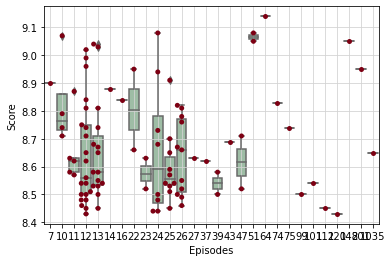

In [227]:
axA = sns.boxplot(x='Episodes', y='Score', data=most_epsiodes_ANOVA, color='#99c2a2')
axA = sns.swarmplot(x='Episodes', y='Score', data=most_epsiodes_ANOVA, color='#7d0013')
plt.grid(zorder=0, color = "#D3D3D3")

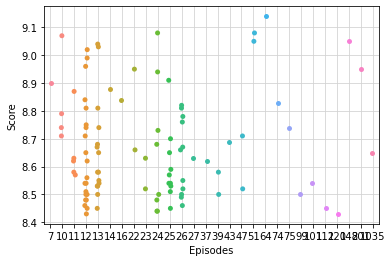

In [228]:
mystripplotA = sns.stripplot(data=most_epsiodes_ANOVA, x="Episodes", y="Score")
plt.grid(zorder=0, color = "#D3D3D3")

In [229]:
least_epsioeds = anime_df.sort_values(by='Episodes').head(20)
least_epsioeds

,Title,Score,Episodes,Aired,Votes
15,Owarimonogatari 2nd Season,8.90,7,Aug 2017 - Aug 2017,349691
3,Shingeki no Kyojin Season 3 Part 2,9.07,10,Apr 2019 - Jul 2019,1849709
34,Mushishi Zoku Shou,8.71,10,Apr 2014 - Jun 2014,270183
29,Mushishi Zoku Shou 2nd Season,8.74,10,Oct 2014 - Dec 2014,237310
25,Haikyuu!!: Karasuno Koukou vs. Shiratorizawa G...,8.79,10,Oct 2016 - Dec 2016,1038960
49,Natsume Yuujinchou Roku,8.63,11,Apr 2017 - Jun 2017,164890
57,Natsume Yuujinchou Go,8.58,11,Oct 2016 - Dec 2016,164164
60,Yojouhan Shinwa Taikei,8.57,11,Apr 2010 - Jul 2010,392964
17,Kimetsu no Yaiba: Yuukaku-hen,8.87,11,Dec 2021 - Feb 2022,893920
52,Ping Pong the Animation,8.62,11,Apr 2014 - Jun 2014,343352


In [230]:
least_epsioeds.reset_index(inplace=True)
least_epsioeds

,index,Title,Score,Episodes,Aired,Votes
0,15,Owarimonogatari 2nd Season,8.90,7,Aug 2017 - Aug 2017,349691
1,3,Shingeki no Kyojin Season 3 Part 2,9.07,10,Apr 2019 - Jul 2019,1849709
2,34,Mushishi Zoku Shou,8.71,10,Apr 2014 - Jun 2014,270183
3,29,Mushishi Zoku Shou 2nd Season,8.74,10,Oct 2014 - Dec 2014,237310
4,25,Haikyuu!!: Karasuno Koukou vs. Shiratorizawa G...,8.79,10,Oct 2016 - Dec 2016,1038960
5,49,Natsume Yuujinchou Roku,8.63,11,Apr 2017 - Jun 2017,164890
6,57,Natsume Yuujinchou Go,8.58,11,Oct 2016 - Dec 2016,164164
7,60,Yojouhan Shinwa Taikei,8.57,11,Apr 2010 - Jul 2010,392964
8,17,Kimetsu no Yaiba: Yuukaku-hen,8.87,11,Dec 2021 - Feb 2022,893920
9,52,Ping Pong the Animation,8.62,11,Apr 2014 - Jun 2014,343352


In [231]:
least_epsioeds_ANOVA_D = least_epsioeds.drop(columns=['Aired', 'Votes'])

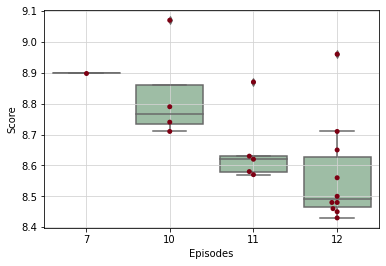

In [232]:
ax = sns.boxplot(x='Episodes', y='Score', data=least_epsioeds_ANOVA_D, color='#99c2a2')
ax = sns.swarmplot(x='Episodes', y='Score', data=least_epsioeds_ANOVA_D, color='#7d0013')
plt.grid(zorder=0, color = "#D3D3D3")

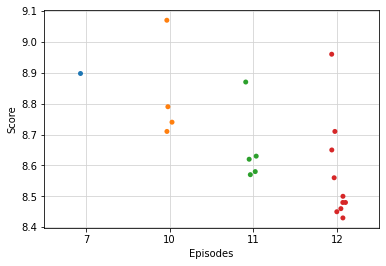

In [233]:
mystripplot = sns.stripplot(data=least_epsioeds_ANOVA_D, x="Episodes", y="Score")
plt.grid(zorder=0, color = "#D3D3D3")

In [234]:
lowest_scores = anime_df.sort_values(by='Score').head(20)
lowest_scores

,Title,Score,Episodes,Aired,Votes
99,Saiki Kusuo no Ψ-nan,8.43,120,Jul 2016 - Dec 2016,922256
98,Mononoke,8.43,12,Jul 2007 - Sep 2007,278180
96,JoJo no Kimyou na Bouken Part 3: Stardust Crus...,8.44,24,Jan 2015 - Jun 2015,935670
97,Saiki Kusuo no Ψ-nan 2,8.44,24,Jan 2018 - Jun 2018,540859
94,Golden Kamuy 3rd Season,8.45,12,Oct 2020 - Dec 2020,127066
93,Yuu☆Yuu☆Hakusho,8.45,112,Oct 1992 - Jan 1995,600131
92,Vivy: Fluorite Eye's Song,8.45,13,Apr 2021 - Jun 2021,423608
95,Haikyuu!!,8.45,25,Apr 2014 - Sep 2014,1701435
91,Owarimonogatari,8.46,12,Oct 2015 - Dec 2015,435280
90,Nichijou,8.46,26,Apr 2011 - Sep 2011,789433


In [235]:
lowest_scores.reset_index(inplace=True)
lowest_scores

,index,Title,Score,Episodes,Aired,Votes
0,99,Saiki Kusuo no Ψ-nan,8.43,120,Jul 2016 - Dec 2016,922256
1,98,Mononoke,8.43,12,Jul 2007 - Sep 2007,278180
2,96,JoJo no Kimyou na Bouken Part 3: Stardust Crus...,8.44,24,Jan 2015 - Jun 2015,935670
3,97,Saiki Kusuo no Ψ-nan 2,8.44,24,Jan 2018 - Jun 2018,540859
4,94,Golden Kamuy 3rd Season,8.45,12,Oct 2020 - Dec 2020,127066
5,93,Yuu☆Yuu☆Hakusho,8.45,112,Oct 1992 - Jan 1995,600131
6,92,Vivy: Fluorite Eye's Song,8.45,13,Apr 2021 - Jun 2021,423608
7,95,Haikyuu!!,8.45,25,Apr 2014 - Sep 2014,1701435
8,91,Owarimonogatari,8.46,12,Oct 2015 - Dec 2015,435280
9,90,Nichijou,8.46,26,Apr 2011 - Sep 2011,789433


In [236]:
lowest_scores_ANOVA_D = lowest_scores.drop(columns=['Aired', 'Votes'])

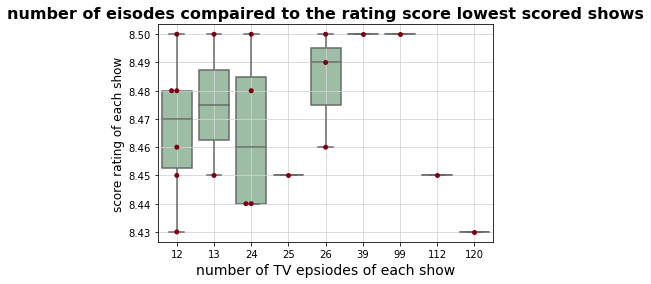

In [237]:
ax = sns.boxplot(x='Episodes', y='Score', data=lowest_scores_ANOVA_D, color='#99c2a2')
ax = sns.swarmplot(x='Episodes', y='Score', data=lowest_scores_ANOVA_D, color='#7d0013')
plt.grid(zorder=0, color = "#D3D3D3")

plt.title("number of eisodes compaired to the rating score lowest scored shows",fontsize=16, fontweight='bold')
plt.xlabel("number of TV epsiodes of each show", fontsize=14)
plt.ylabel("score rating of each show",fontsize=12)
plt.grid(zorder=0, color = "#D3D3D3")

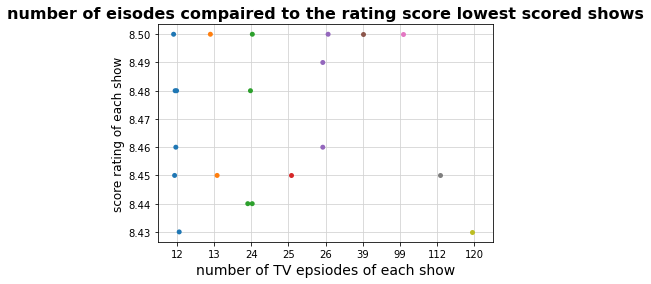

In [238]:
mystripplot2 = sns.stripplot(data=lowest_scores_ANOVA_D, x="Episodes", y="Score")
plt.grid(zorder=0, color = "#D3D3D3")

plt.title("number of eisodes compaired to the rating score lowest scored shows",fontsize=16, fontweight='bold')
plt.xlabel("number of TV epsiodes of each show", fontsize=14)
plt.ylabel("score rating of each show",fontsize=12)
plt.grid(zorder=0, color = "#D3D3D3")

In [239]:
highest_scores =  anime_df.sort_values(by='Score', ascending=False).head(20)
highest_scores

,Title,Score,Episodes,Aired,Votes
0,Fullmetal Alchemist: Brotherhood,9.14,64,Apr 2009 - Jul 2010,2895245
1,Gintama,9.08,51,Apr 2015 - Mar 2016,537423
2,Steins;Gate,9.08,24,Apr 2011 - Sep 2011,2246631
3,Shingeki no Kyojin Season 3 Part 2,9.07,10,Apr 2019 - Jul 2019,1849709
4,Gintama',9.05,51,Apr 2011 - Mar 2012,473756
5,Hunter x Hunter (2011),9.05,148,Oct 2011 - Sep 2014,2384407
6,Gintama': Enchousen,9.04,13,Oct 2012 - Mar 2013,282513
7,Fruits Basket: The Final,9.03,13,Apr 2021 - Jun 2021,351472
8,Spy x Family,9.02,12,Apr 2022 - Jun 2022,776383
9,Gintama.,8.99,12,Jan 2017 - Mar 2017,269348


In [240]:
highest_scores.reset_index(inplace=True)
highest_scores

,index,Title,Score,Episodes,Aired,Votes
0,0,Fullmetal Alchemist: Brotherhood,9.14,64,Apr 2009 - Jul 2010,2895245
1,1,Gintama,9.08,51,Apr 2015 - Mar 2016,537423
2,2,Steins;Gate,9.08,24,Apr 2011 - Sep 2011,2246631
3,3,Shingeki no Kyojin Season 3 Part 2,9.07,10,Apr 2019 - Jul 2019,1849709
4,4,Gintama',9.05,51,Apr 2011 - Mar 2012,473756
5,5,Hunter x Hunter (2011),9.05,148,Oct 2011 - Sep 2014,2384407
6,6,Gintama': Enchousen,9.04,13,Oct 2012 - Mar 2013,282513
7,7,Fruits Basket: The Final,9.03,13,Apr 2021 - Jun 2021,351472
8,8,Spy x Family,9.02,12,Apr 2022 - Jun 2022,776383
9,9,Gintama.,8.99,12,Jan 2017 - Mar 2017,269348


In [241]:
highest_scores_ANOVA = highest_scores.drop(columns=['Aired', 'Votes'])

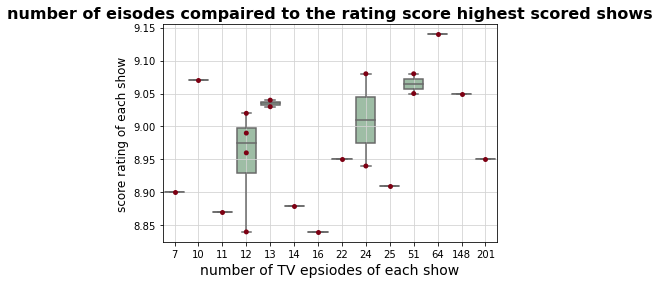

In [242]:
ax = sns.boxplot(x='Episodes', y='Score', data=highest_scores_ANOVA, color='#99c2a2')
ax = sns.swarmplot(x='Episodes', y='Score', data=highest_scores_ANOVA, color='#7d0013')
plt.grid(zorder=0, color = "#D3D3D3")

plt.title("number of eisodes compaired to the rating score highest scored shows",fontsize=16, fontweight='bold')
plt.xlabel("number of TV epsiodes of each show", fontsize=14)
plt.ylabel("score rating of each show",fontsize=12)
plt.grid(zorder=0, color = "#D3D3D3")

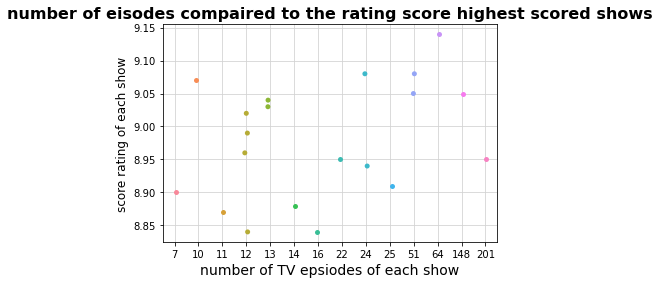

In [243]:
mystripplot2 = sns.stripplot(data=highest_scores_ANOVA, x="Episodes", y="Score")
plt.grid(zorder=0, color = "#D3D3D3")

plt.title("number of eisodes compaired to the rating score highest scored shows",fontsize=16, fontweight='bold')
plt.xlabel("number of TV epsiodes of each show", fontsize=14)
plt.ylabel("score rating of each show",fontsize=12)
plt.grid(zorder=0, color = "#D3D3D3")

In [244]:
Drug_regimen = drug_groups["Mouse ID"].count()
drug_pdplot_1 = highest_scores_ANOVA.plot.bar( rot = 65, title = "top 20 scores by voter", fontsize =12, color = "gold")
drug_pdplot_1.set_xlabel("Drug Regimen")
drug_pdplot_1.set_ylabel("Total # of Mice")
plt.xlim(-0.5, len(x_axis_1))
plt.ylim(0, 250)
plt.grid(zorder=0, color ='gold')
drug_pdplot_1


NameError: name 'drug_groups' is not defined

In [ ]:
least_voters = anime_df.sort_values(by='Votes').head(20)
least_voters

In [ ]:
least_voters.reset_index(inplace=True)
least_voters

In [245]:
least_voters_ANOVA = least_voters.drop(columns=['Aired', 'Votes'])

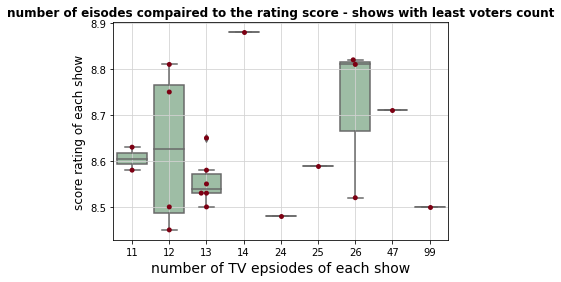

In [246]:
ax = sns.boxplot(x='Episodes', y='Score', data=least_voters_ANOVA, color='#99c2a2')
ax = sns.swarmplot(x='Episodes', y='Score', data=least_voters_ANOVA, color='#7d0013')
plt.grid(zorder=0, color = "#D3D3D3")

plt.title("number of eisodes compaired to the rating score - shows with least voters count",fontsize=12, fontweight='bold')
plt.xlabel("number of TV epsiodes of each show", fontsize=14)
plt.ylabel("score rating of each show",fontsize=12)
plt.grid(zorder=0, color = "#D3D3D3")

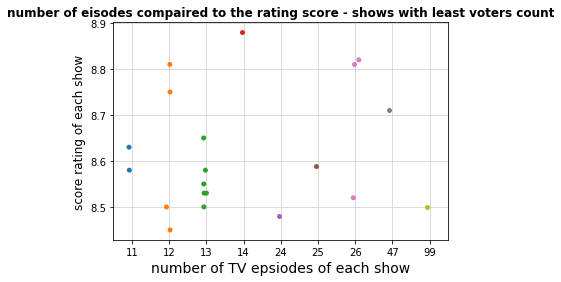

In [247]:
mystripplot2 = sns.stripplot(data=least_voters_ANOVA, x="Episodes", y="Score")
plt.grid(zorder=0, color = "#D3D3D3")

plt.title("number of eisodes compaired to the rating score - shows with least voters count",fontsize=12, fontweight='bold')
plt.xlabel("number of TV epsiodes of each show", fontsize=14)
plt.ylabel("score rating of each show",fontsize=12)
plt.grid(zorder=0, color = "#D3D3D3")

In [248]:
most_voters = anime_df.sort_values(by='Votes', ascending=False).head(20)
most_voters

,Title,Score,Episodes,Aired,Votes
72,Shingeki no Kyojin,8.53,25,Apr 2013 - Sep 2013,3435959
54,Death Note,8.62,37,Oct 2006 - Jun 2007,3418953
0,Fullmetal Alchemist: Brotherhood,9.14,64,Apr 2009 - Jul 2010,2895245
78,One Punch Man,8.51,12,Oct 2015 - Dec 2015,2805549
63,Kimetsu no Yaiba,8.55,26,Apr 2019 - Sep 2019,2448779
5,Hunter x Hunter (2011),9.05,148,Oct 2011 - Sep 2014,2384407
80,Shingeki no Kyojin Season 2,8.50,12,Apr 2017 - Jun 2017,2325904
2,Steins;Gate,9.08,24,Apr 2011 - Sep 2011,2246631
37,Code Geass: Hangyaku no Lelouch,8.70,25,Oct 2006 - Jul 2007,1994254
53,Shingeki no Kyojin Season 3,8.62,12,Jul 2018 - Oct 2018,1970117


In [249]:
most_voters.reset_index(inplace=True)
most_voters

,index,Title,Score,Episodes,Aired,Votes
0,72,Shingeki no Kyojin,8.53,25,Apr 2013 - Sep 2013,3435959
1,54,Death Note,8.62,37,Oct 2006 - Jun 2007,3418953
2,0,Fullmetal Alchemist: Brotherhood,9.14,64,Apr 2009 - Jul 2010,2895245
3,78,One Punch Man,8.51,12,Oct 2015 - Dec 2015,2805549
4,63,Kimetsu no Yaiba,8.55,26,Apr 2019 - Sep 2019,2448779
5,5,Hunter x Hunter (2011),9.05,148,Oct 2011 - Sep 2014,2384407
6,80,Shingeki no Kyojin Season 2,8.50,12,Apr 2017 - Jun 2017,2325904
7,2,Steins;Gate,9.08,24,Apr 2011 - Sep 2011,2246631
8,37,Code Geass: Hangyaku no Lelouch,8.70,25,Oct 2006 - Jul 2007,1994254
9,53,Shingeki no Kyojin Season 3,8.62,12,Jul 2018 - Oct 2018,1970117


In [250]:
most_voters_ANOVA_D = most_voters.drop(columns=['Aired', 'Votes'])

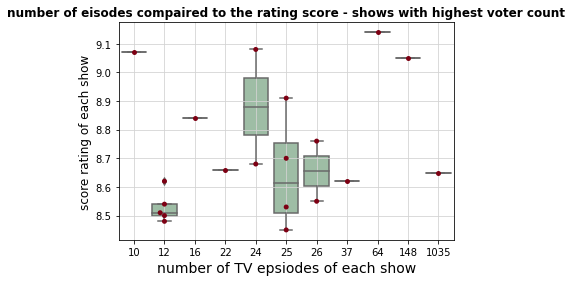

In [251]:
ax = sns.boxplot(x='Episodes', y='Score', data=most_voters_ANOVA_D, color='#99c2a2')
ax = sns.swarmplot(x='Episodes', y='Score', data=most_voters_ANOVA_D, color='#7d0013')
plt.grid(zorder=0, color = "#D3D3D3")

plt.title("number of eisodes compaired to the rating score - shows with highest voter count",fontsize=12, fontweight='bold')
plt.xlabel("number of TV epsiodes of each show", fontsize=14)
plt.ylabel("score rating of each show",fontsize=12)
plt.grid(zorder=0, color = "#D3D3D3")

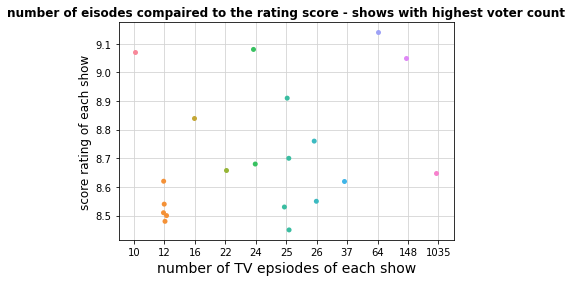

In [252]:
mystripplot2 = sns.stripplot(data=most_voters_ANOVA_D, x="Episodes", y="Score")
plt.grid(zorder=0, color = "#D3D3D3")

plt.title("number of eisodes compaired to the rating score - shows with highest voter count",fontsize=12, fontweight='bold')
plt.xlabel("number of TV epsiodes of each show", fontsize=14)
plt.ylabel("score rating of each show",fontsize=12)
plt.grid(zorder=0, color = "#D3D3D3")

In [253]:
newest_anime = anime_df.sort_values(by='Aired', ascending=False).head(20)
newest_anime.reset_index(inplace=True)
newest_anime

,index,Title,Score,Episodes,Aired,Votes
0,50,Ousama Ranking,8.63,23,Oct 2021 - Mar 2022,420388
1,35,86 Part 2,8.71,12,Oct 2021 - Mar 2022,311820
2,30,Mushoku Tensei: Isekai Ittara Honki Dasu Part 2,8.74,12,Oct 2021 - Dec 2021,597144
3,39,Jujutsu Kaisen,8.68,24,Oct 2020 - Mar 2021,1876361
4,94,Golden Kamuy 3rd Season,8.45,12,Oct 2020 - Dec 2020,127066
5,69,Haikyuu!! To the Top Part 2,8.54,12,Oct 2020 - Dec 2020,656349
6,89,Chihayafuru 3,8.48,24,Oct 2019 - Mar 2020,119986
7,56,JoJo no Kimyou na Bouken Part 5: Ougon no Kaze,8.58,39,Oct 2018 - Jul 2019,843569
8,11,3-gatsu no Lion 2nd Season,8.95,22,Oct 2017 - Mar 2018,353099
9,71,Gintama.: Porori-hen,8.53,13,Oct 2017 - Dec 2017,173918


In [254]:
newest_anime_ANOVA_D = newest_anime.drop(columns=['Aired', 'Votes'])

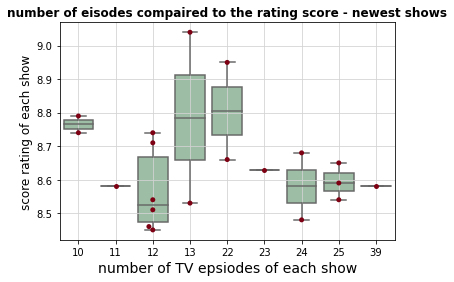

In [255]:
ax = sns.boxplot(x='Episodes', y='Score', data=newest_anime_ANOVA_D, color='#99c2a2')
ax = sns.swarmplot(x='Episodes', y='Score', data=newest_anime_ANOVA_D, color='#7d0013')
plt.grid(zorder=0, color = "#D3D3D3")

plt.title("number of eisodes compaired to the rating score - newest shows",fontsize=12, fontweight='bold')
plt.xlabel("number of TV epsiodes of each show", fontsize=14)
plt.ylabel("score rating of each show",fontsize=12)
plt.grid(zorder=0, color = "#D3D3D3")

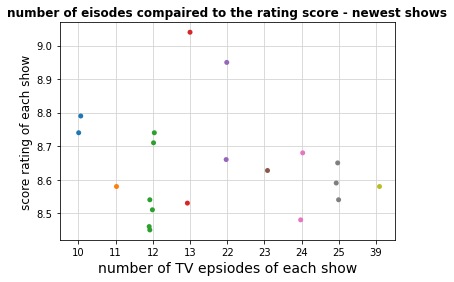

In [256]:
mystripplot2 = sns.stripplot(data=newest_anime_ANOVA_D, x="Episodes", y="Score")
plt.grid(zorder=0, color = "#D3D3D3")

plt.title("number of eisodes compaired to the rating score - newest shows",fontsize=12, fontweight='bold')
plt.xlabel("number of TV epsiodes of each show", fontsize=14)
plt.ylabel("score rating of each show",fontsize=12)
plt.grid(zorder=0, color = "#D3D3D3")

In [257]:
oldest_anime = anime_df['Aired']
oldest_anime = anime_df.sort_values(by='Aired').head(20)
oldest_anime.reset_index(inplace=True)
oldest_anime

,index,Title,Score,Episodes,Aired,Votes
0,27,Cowboy Bebop,8.76,26,Apr 1998 - Apr 1999,1620487
1,20,Monster,8.83,74,Apr 2004 - Sep 2005,858110
2,74,Nana,8.52,47,Apr 2006 - Mar 2007,551280
3,12,Gintama,8.95,201,Apr 2006 - Mar 2010,946472
4,51,Tengen Toppa Gurren Lagann,8.63,27,Apr 2007 - Sep 2007,1450101
5,14,Code Geass: Hangyaku no Lelouch R2,8.91,25,Apr 2008 - Sep 2008,1572371
6,0,Fullmetal Alchemist: Brotherhood,9.14,64,Apr 2009 - Jul 2010,2895245
7,60,Yojouhan Shinwa Taikei,8.57,11,Apr 2010 - Jul 2010,392964
8,86,Rainbow: Nisha Rokubou no Shichinin,8.49,26,Apr 2010 - Sep 2010,359375
9,4,Gintama',9.05,51,Apr 2011 - Mar 2012,473756


In [258]:
oldest_anime_ANOVA_D = oldest_anime.drop(columns=['Aired', 'Votes'])

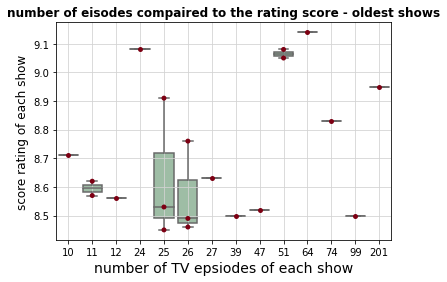

In [259]:
ax = sns.boxplot(x='Episodes', y='Score', data=oldest_anime_ANOVA_D, color='#99c2a2')
ax = sns.swarmplot(x='Episodes', y='Score', data=oldest_anime_ANOVA_D, color='#7d0013')
plt.grid(zorder=0, color = "#D3D3D3")

plt.title("number of eisodes compaired to the rating score - oldest shows",fontsize=12, fontweight='bold')
plt.xlabel("number of TV epsiodes of each show", fontsize=14)
plt.ylabel("score rating of each show",fontsize=12)
plt.grid(zorder=0, color = "#D3D3D3")

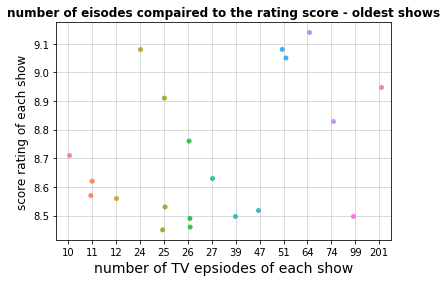

In [260]:
mystripplot2 = sns.stripplot(data=oldest_anime, x="Episodes", y="Score")
plt.grid(zorder=0, color = "#D3D3D3")

plt.title("number of eisodes compaired to the rating score - oldest shows",fontsize=12, fontweight='bold')
plt.xlabel("number of TV epsiodes of each show", fontsize=14)
plt.ylabel("score rating of each show",fontsize=12)
plt.grid(zorder=0, color = "#D3D3D3")

In [261]:
anime_df['Aired'] 

0     Apr 2009 - Jul 2010
1     Apr 2015 - Mar 2016
2     Apr 2011 - Sep 2011
3     Apr 2019 - Jul 2019
4     Apr 2011 - Mar 2012
             ...         
95    Apr 2014 - Sep 2014
96    Jan 2015 - Jun 2015
97    Jan 2018 - Jun 2018
98    Jul 2007 - Sep 2007
99    Jul 2016 - Dec 2016
Name: Aired, Length: 100, dtype: object

In [266]:
Most_Votes = most_voters
Lowest_Votes = least_voters
# M_Votes_axis = most_voters
# L_Votes_axis = least_voters

High_scores = highest_scores
Lowest_scores = lowest_scores
# H_Score_axis = highest_scores
# L_Score_axis = lowest_scores

Most_Episodes = most_epsiodes
Least_Episopdes = least_epsioeds
# M_Episodes_axis = most_epsiodes
# L_Episodes_axis = least_epsioeds


In [267]:
Least_Episopdes

,index,Title,Score,Episodes,Aired,Votes
0,15,Owarimonogatari 2nd Season,8.90,7,Aug 2017 - Aug 2017,349691
1,3,Shingeki no Kyojin Season 3 Part 2,9.07,10,Apr 2019 - Jul 2019,1849709
2,34,Mushishi Zoku Shou,8.71,10,Apr 2014 - Jun 2014,270183
3,29,Mushishi Zoku Shou 2nd Season,8.74,10,Oct 2014 - Dec 2014,237310
4,25,Haikyuu!!: Karasuno Koukou vs. Shiratorizawa G...,8.79,10,Oct 2016 - Dec 2016,1038960
5,49,Natsume Yuujinchou Roku,8.63,11,Apr 2017 - Jun 2017,164890
6,57,Natsume Yuujinchou Go,8.58,11,Oct 2016 - Dec 2016,164164
7,60,Yojouhan Shinwa Taikei,8.57,11,Apr 2010 - Jul 2010,392964
8,17,Kimetsu no Yaiba: Yuukaku-hen,8.87,11,Dec 2021 - Feb 2022,893920
9,52,Ping Pong the Animation,8.62,11,Apr 2014 - Jun 2014,343352
